# Analysis for results filter_first approach

In [1]:
from joblib import load
import pandas as pd
import numpy as np
import os
import re

import matplotlib.pyplot as plt

In [2]:
def atoi(text):
    return int(text) if text.isdigit() else text
def natural_keys(text):
    return [ atoi(c) for c in re.split('(\d+)',text) ]

dir_results = '/home/pedrosergiot/Documents/Attention_Classification_PCA/pca_filter_first_results/'
filenames = os.listdir(dir_results)
filenames.sort(key=natural_keys)
print(filenames)

['ResultsGrid_1_Windows', 'ResultsGrid_2_Windows', 'ResultsGrid_3_Windows', 'ResultsGrid_4_Windows', 'ResultsGrid_5_Windows', 'ResultsGrid_6_Windows', 'ResultsGrid_7_Windows', 'ResultsGrid_8_Windows', 'ResultsGrid_9_Windows', 'ResultsGrid_10_Windows', 'ResultsGrid_11_Windows', 'ResultsGrid_12_Windows', 'ResultsGrid_13_Windows', 'ResultsGrid_14_Windows', 'ResultsGrid_15_Windows', 'ResultsGrid_16_Windows', 'ResultsGrid_17_Windows', 'ResultsGrid_18_Windows', 'ResultsGrid_19_Windows', 'ResultsGrid_20_Windows', 'ResultsGrid_21_Windows', 'ResultsGrid_22_Windows', 'ResultsGrid_23_Windows', 'ResultsGrid_24_Windows', 'ResultsGrid_25_Windows', 'ResultsGrid_26_Windows', 'ResultsGrid_27_Windows', 'ResultsGrid_28_Windows', 'ResultsGrid_29_Windows', 'ResultsGrid_30_Windows', 'ResultsGrid_31_Windows', 'ResultsGrid_32_Windows', 'ResultsGrid_33_Windows', 'ResultsGrid_34_Windows', 'ResultsGrid_35_Windows', 'ResultsGrid_36_Windows', 'ResultsGrid_37_Windows', 'ResultsGrid_38_Windows', 'ResultsGrid_39_Wind

In [3]:
best_results1 = []

for name in filenames:
    results_df = pd.DataFrame(load(dir_results + name))
    
    gf = results_df.groupby(['npcs','neurons1','neurons2'])    
    max_mean1 = 0
    
    for key in gf.groups.keys():        
        if gf.get_group(key)['acc'].mean() > max_mean1:
            max_mean1 = gf.get_group(key)['acc'].mean()
            max_std1 = gf.get_group(key)['acc'].std()
            max_key1 = key
    
    best_results1.append((max_mean1, max_std1, max_key1))
best_results1 = np.array(best_results1)

NameError: name 'log2' is not defined

In [23]:
# ITR calculation
fs = 601.5
Ts = 1/fs
janelasinal = 64
N = 2
acc = best_results1[:,0]
acc = acc.astype(np.float64)
std = best_results1[:,1]
std = std.astype(np.float64)

s = np.array(range(1,len(best_results1)+1))
s = 60/((s+10)*janelasinal*Ts);

itr = s*(np.log2(2) + acc*np.log2(acc) + (1-acc)*np.log2((1-acc)/(N-1)))
itr_std = s*std*(np.log2(acc) - np.log2(1-acc))

print(itr)
print(itr_std)

[2.74873947 2.3914946  2.20336641 1.85367911 1.91319568 1.70008268
 1.76878407 1.85115238 1.94052626 1.51459198 1.44512386 1.45399372
 1.4538256  1.40059385 1.54987788 1.41570297 1.37472    1.38608413
 1.39356089 1.28945308 1.25194676 1.26899731 1.35165408 1.31189945
 1.33164425 1.45489392 1.41758285 1.54795672 1.80470772 1.58361584
 1.43276194 1.51016755 1.31695192 1.33867094 1.25669832 1.09225185
 1.10964616 0.96372668 0.90195882 0.91961895 0.94427874 0.85122975
 0.9466207  1.17610191 0.95500012 0.97015233 0.91888043 0.86626883
 0.95849879 0.83860561 0.79064492 0.77674531 0.89764172 0.75469568
 0.77297834 0.85449369 0.81087353 0.76914484 0.78736995 0.74929369
 0.76519057 0.75456292 0.83423889 0.7652558  0.75298636 0.77502002
 0.70852295 0.90571299 0.77292194 0.79077845 0.78304984 0.71734585
 0.65638903 0.62264115 0.61444213 0.68306097 0.62272399 0.59180925
 0.5637179  0.58030654 0.57229902 0.54375737 0.51936047 0.49285636
 0.48693552 0.44217067]
[2.5059469  3.0942431  2.47395422 2.62

In [20]:
best_results2 = []
count = 0

for name in filenames:
    results_df = pd.DataFrame(load(dir_results + name))
    best_mean = best_results1[count]
    
    gf = results_df.groupby(['npcs','neurons1','neurons2'])
    max_mean2 = 0
    
    for key in gf.groups.keys():        
        if gf.get_group(key)['acc'].mean() > max_mean2 and gf.get_group(key)['acc'].std() < 0.05:
            max_mean2 = gf.get_group(key)['acc'].mean()
            max_std2 = gf.get_group(key)['acc'].std()
            max_key2 = key
    
    if max_mean2 == 0:
        max_mean2 = best_mean[0]
        max_std2 = best_mean[1]
        max_key2 = best_mean[2]
    
    best_results2.append((max_mean2, max_std2, max_key2))
    count += 1
    
best_results2 = np.array(best_results2)

In [15]:
best_results1

array([[0.6354679763317108, 0.060968533114096876, (16, 4, 0)],
       [0.632019704580307, 0.08438093455112998, (19, 10, 5)],
       [0.6318965375423431, 0.07315921934912979, (18, 2, 9)],
       [0.6256157636642456, 0.08793714387784855, (11, 9, 10)],
       [0.632019704580307, 0.076150911311395, (17, 10, 9)],
       [0.6285714149475098, 0.05798561555673759, (18, 7, 9)],
       [0.6350985109806061, 0.07154183216509281, (11, 5, 9)],
       [0.6421182215213775, 0.08414573213033447, (11, 10, 0)],
       [0.6493842244148255, 0.0403221401327088, (11, 4, 0)],
       [0.6355911254882812, 0.0739245771007537, (19, 4, 3)],
       [0.6357142806053162, 0.04975394799180866, (20, 9, 0)],
       [0.6392857134342194, 0.0831064402158033, (20, 9, 10)],
       [0.6423645317554474, 0.06131636134413037, (17, 9, 0)],
       [0.6427339792251587, 0.07658045345226963, (14, 7, 9)],
       [0.6530788123607636, 0.09661546791336016, (17, 8, 10)],
       [0.649261075258255, 0.06201214432147157, (16, 4, 10)],
       [

In [7]:
best_results2

array([[0.6078817665576934, 0.046614740743035975, (16, 3, 9)],
       [0.6146551668643951, 0.04911873981162084, (15, 1, 0)],
       [0.6252462923526764, 0.04309386498970366, (18, 6, 5)],
       [0.6146551609039307, 0.04635099778597744, (11, 5, 4)],
       [0.6181034505367279, 0.03899813434047543, (17, 3, 4)],
       [0.6181034445762634, 0.045269486536255996, (17, 3, 0)],
       [0.6253694534301758, 0.048810192935324105, (18, 10, 6)],
       [0.6214285612106323, 0.04283165092532372, (15, 8, 0)],
       [0.6493842244148255, 0.0403221401327088, (11, 4, 0)],
       [0.6322660028934479, 0.04690665811864477, (20, 4, 8)],
       [0.6357142806053162, 0.04975394799180866, (20, 9, 0)],
       [0.6321428537368774, 0.04797180938959973, (18, 5, 0)],
       [0.6322660088539124, 0.049643428039584936, (19, 3, 0)],
       [0.6284482717514038, 0.04039729225883853, (13, 2, 0)],
       [0.6253694534301758, 0.04539346476043971, (13, 6, 3)],
       [0.6321428477764129, 0.04164613457076381, (13, 6, 5)],
    

In [21]:
a = best_results1[:,2]
num_pcs = [pc[0] for pc in a]
num_neurons1 = [neurons[1] for neurons in a]

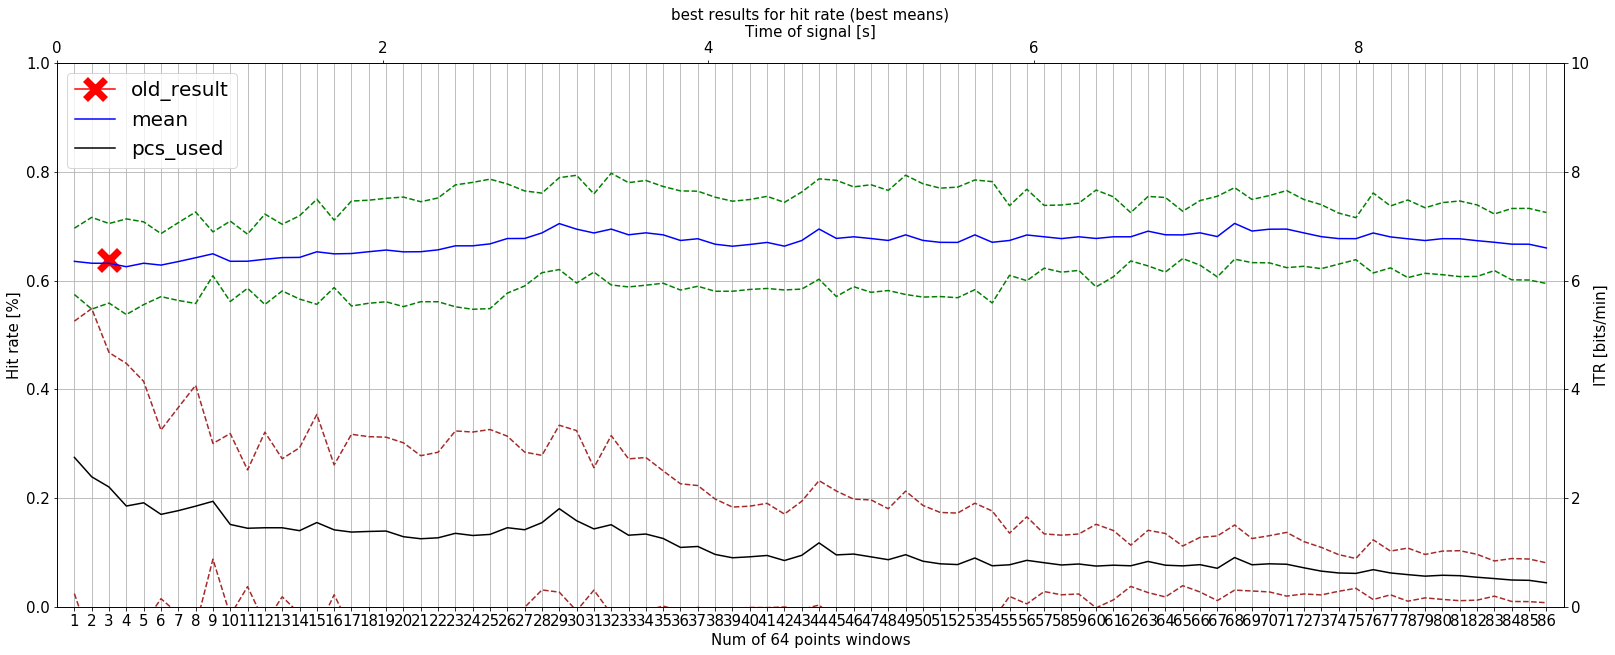

In [21]:
fig,ax = plt.subplots(figsize=(27,10))
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.set_xlabel('Num of 64 points windows', fontsize=15)
ax.set_ylabel('Hit rate [%]', fontsize=15)
ax.set_title('best results for hit rate (best means)', fontsize=15)
plt.xticks(np.arange(len(best_results1[:,0])), np.arange(1, len(best_results1[:,0])+1))
plt.axis([-1,len(best_results1[:,0]),0,1.0])
plt.grid(True)

plt0 = ax.plot([2], [0.6372], markersize=20, markeredgewidth=7, marker='x', color='red', label='old_result')
plt1 = ax.plot(best_results1[:,0], color='blue', label='mean');
ax.plot(best_results1[:,0] - best_results1[:,1], color='green', linestyle='--', label='std_low');
ax.plot(best_results1[:,0] + best_results1[:,1], color='green', linestyle='--', label='std_high');

ax2 = ax.twinx();
ax2.set_ylabel('ITR [bits/min]', fontsize=15);
plt2 = ax2.plot(itr, color='black', label='pcs_used');
ax2.plot(itr + itr_std, color='brown', linestyle='--')
ax2.plot(itr - itr_std, color='brown', linestyle='--')
ax2.yaxis.set_tick_params(labelsize=15)
ax2.set_ylim(bottom=0, top=10);
ax2.yaxis.set_tick_params(labelsize=15)

lns = plt0+plt1+plt2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=2, fontsize=20);

def nwin_time(x):
    return (x+1)*64/601.5

def time_nwin(x):
    return x*601.5/64

secax = ax.secondary_xaxis('top', functions=(nwin_time, time_nwin))
secax.set_xlabel('Time of signal [s]', fontsize=15)
secax.xaxis.set_tick_params(labelsize=15)

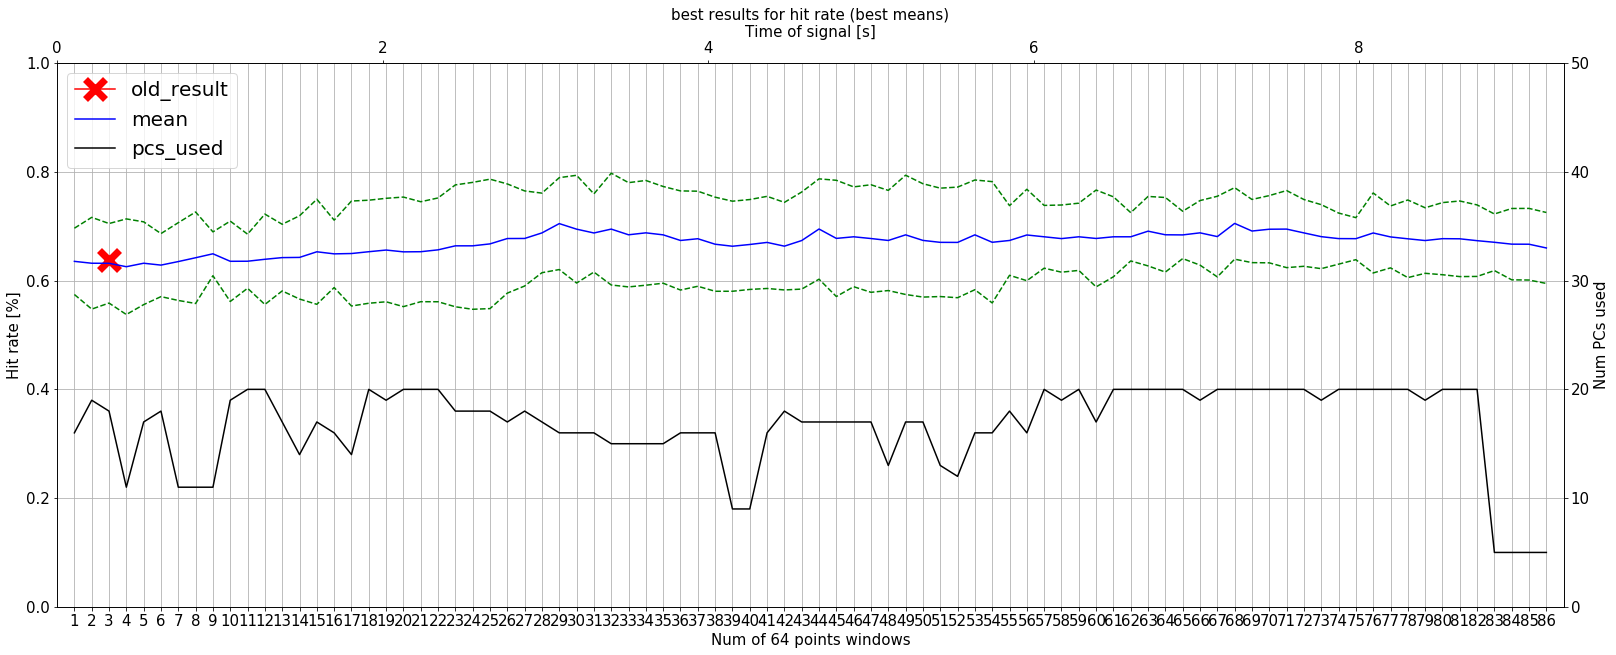

In [22]:
fig,ax = plt.subplots(figsize=(27,10))
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.set_xlabel('Num of 64 points windows', fontsize=15)
ax.set_ylabel('Hit rate [%]', fontsize=15)
ax.set_title('best results for hit rate (best means)', fontsize=15)
plt.xticks(np.arange(len(best_results1[:,0])), np.arange(1, len(best_results1[:,0])+1))
plt.axis([-1,len(best_results1[:,0]),0,1.0])
plt.grid(True)

plt0 = ax.plot([2], [0.6372], markersize=20, markeredgewidth=7, marker='x', color='red', label='old_result')
plt1 = ax.plot(best_results1[:,0], color='blue', label='mean');
ax.plot(best_results1[:,0] - best_results1[:,1], color='green', linestyle='--', label='std_low');
ax.plot(best_results1[:,0] + best_results1[:,1], color='green', linestyle='--', label='std_high');

ax2 = ax.twinx();
ax2.set_ylabel('Num PCs used', fontsize=15);
plt2 = ax2.plot(num_pcs, color='black', label='pcs_used');
ax2.yaxis.set_tick_params(labelsize=15)
ax2.set_ylim(bottom=0, top=50);
ax2.yaxis.set_tick_params(labelsize=15)

lns = plt0+plt1+plt2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=2, fontsize=20);

def nwin_time(x):
    return (x+1)*64/601.5

def time_nwin(x):
    return x*601.5/64

secax = ax.secondary_xaxis('top', functions=(nwin_time, time_nwin))
secax.set_xlabel('Time of signal [s]', fontsize=15)
secax.xaxis.set_tick_params(labelsize=15)

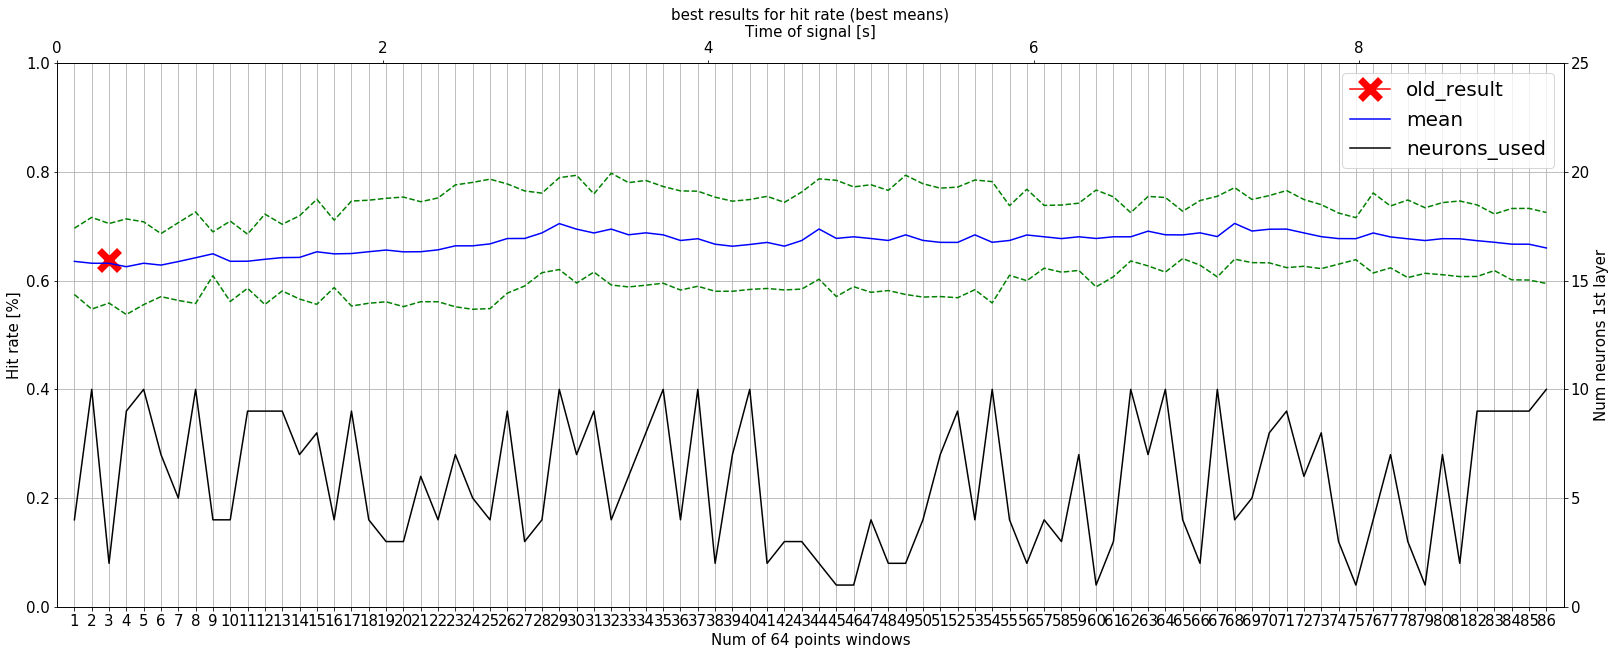

In [23]:
fig,ax = plt.subplots(figsize=(27,10))
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.set_xlabel('Num of 64 points windows', fontsize=15)
ax.set_ylabel('Hit rate [%]', fontsize=15)
ax.set_title('best results for hit rate (best means)', fontsize=15)
plt.xticks(np.arange(len(best_results1[:,0])), np.arange(1, len(best_results1[:,0])+1))
plt.axis([-1,len(best_results1[:,0]),0,1.0])
plt.grid(True)

plt0 = ax.plot([2], [0.6372], markersize=20, markeredgewidth=7, marker='x', color='red', label='old_result')
plt1 = ax.plot(best_results1[:,0], color='blue', label='mean');
ax.plot(best_results1[:,0] - best_results1[:,1], color='green', linestyle='--', label='std_low');
ax.plot(best_results1[:,0] + best_results1[:,1], color='green', linestyle='--', label='std_high');

ax2 = ax.twinx();
ax2.set_ylabel('Num neurons 1st layer', fontsize=15);
plt2 = ax2.plot(num_neurons1, color='black', label='neurons_used');
ax2.yaxis.set_tick_params(labelsize=15)
ax2.set_ylim(bottom=0, top=25);
ax2.yaxis.set_tick_params(labelsize=15)

lns = plt0+plt1+plt2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=1, fontsize=20);

def nwin_time(x):
    return (x+1)*64/601.5

def time_nwin(x):
    return x*601.5/64

secax = ax.secondary_xaxis('top', functions=(nwin_time, time_nwin))
secax.set_xlabel('Time of signal [s]', fontsize=15)
secax.xaxis.set_tick_params(labelsize=15)

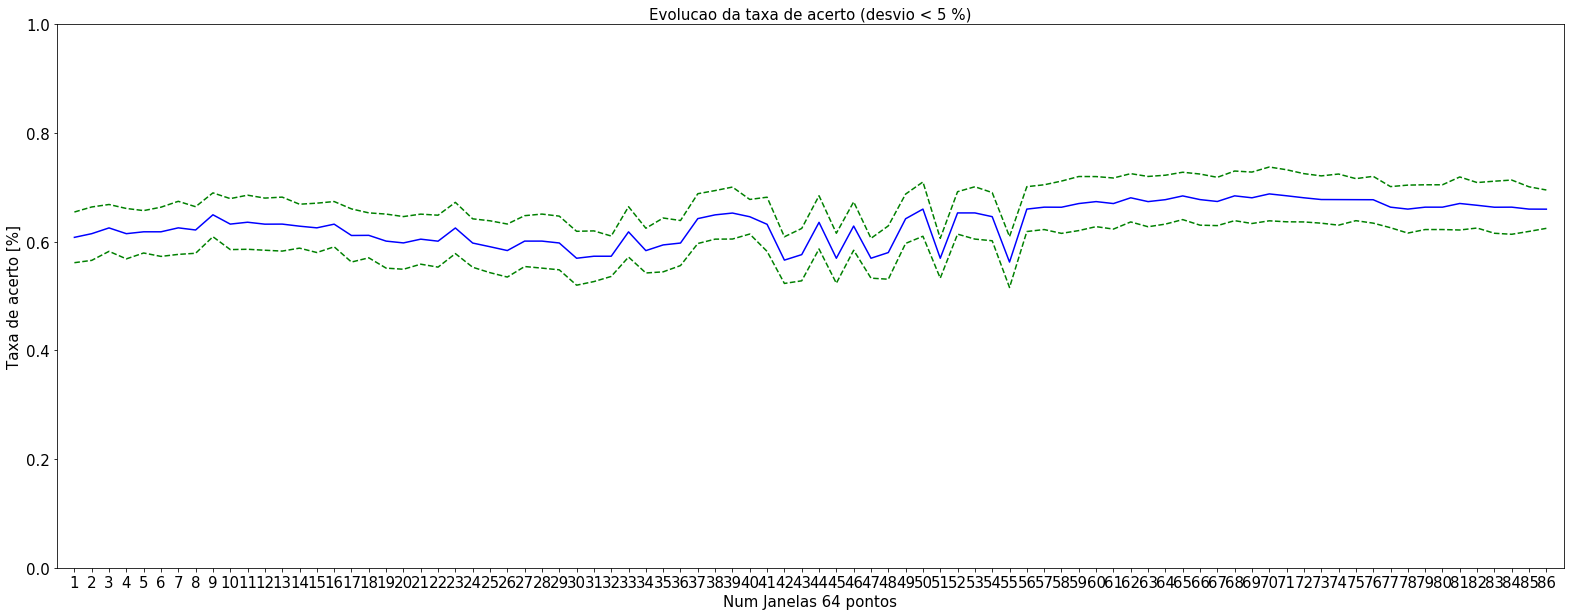

In [11]:
fig,ax = plt.subplots(figsize=(27,10))
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.set_xlabel('Num Janelas 64 pontos', fontsize=15)
ax.set_ylabel('Taxa de acerto [%]', fontsize=15)
ax.set_title('Evolucao da taxa de acerto (desvio < 5 %)', fontsize=15)
plt.xticks(np.arange(len(best_results2[:,0])), np.arange(1, len(best_results2[:,0])+1))
plt.axis([-1,len(best_results2[:,0]),0,1.0])

x = np.linspace(1,len(best_results2[:,0])+1,len(best_results2[:,0]))
ax.plot(best_results2[:,0], color='blue');
ax.plot(best_results2[:,0] - best_results2[:,1], color='green', linestyle='--');
ax.plot(best_results2[:,0] + best_results2[:,1], color='green', linestyle='--');